In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [14]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [23]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors='coerce')


In [18]:
#differentiating numerical and categorical data

In [24]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']
num_cols=[col for col in df.columns if df[col].dtype !='object']

In [25]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [26]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'red']

In [27]:
#unique values 

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has ['ckd' 'ckd\t' 'notckd'] values 



In [30]:
#replace unwanted values 
df['diabetes_mellitus'].replace(to_replace = {' yes':'yes','\tno':'no','\tyes':'yes'},inplace =True)

In [31]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [32]:

df['coronary_artery_disease'].replace(to_replace = {' yes':'yes','\tno':'no','\tyes':'yes'},inplace =True)

In [34]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [35]:
df['class'].replace(to_replace='ckd\t',value='ckd',inplace=True)

In [36]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [39]:
#replacing ckd and notckd with 0 and 1
df['class']=df['class'].map({'ckd':0,'notckd':1})

In [40]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has [0 1] values 



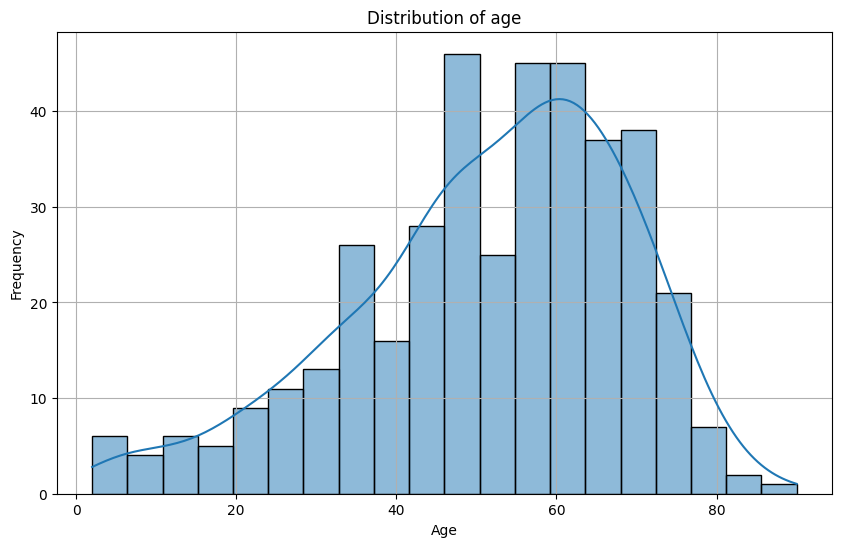

In [45]:
#univariate
plt.figure(figsize=(10,6))
sns.histplot(df.age.dropna(),kde = True,bins=20)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [46]:
#insight>> dist of age is right skewed

In [47]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class', 'red'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

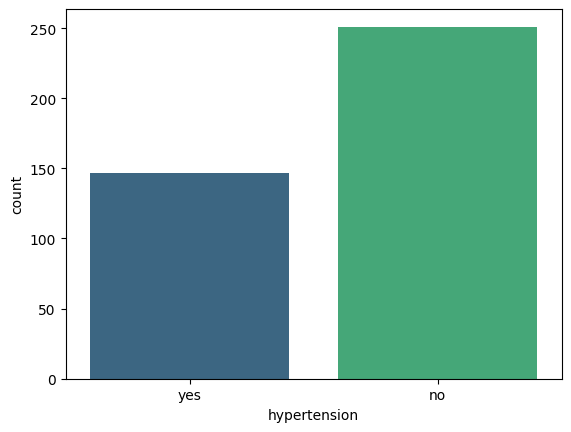

In [50]:
sns.countplot(x=df.hypertension,palette='viridis')

In [51]:
# Insight>> 150 of them have hypertension

In [53]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class', 'red'],
      dtype='object')